In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
books = pd.read_csv('./books2.csv')
users = pd.read_csv('./users2.csv')
books = books.iloc[:,1:]
users = users.iloc[:,1:]

In [4]:
books.isnull().sum()

isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_url                    0
language                   0
category                   0
summary                67227
img_path                   0
dtype: int64

In [5]:
duplciated_books = books[books[['book_title', 'book_author']].duplicated(keep = False)].sort_values(by = ['book_title','book_author'])['book_title'].unique()

In [6]:
duplicated = books[books[['book_title', 'book_author']].duplicated(keep = False)]

In [7]:
notnull_titles = duplicated[duplicated['summary'].notnull()]['book_title'].values
notnull_summary = duplicated[duplicated['summary'].notnull()]['summary'].values

summary_dict = dict(zip(notnull_titles, notnull_summary))

In [8]:
b = books.copy()

In [9]:
for k,v in summary_dict.items() : 
    b.loc[b['book_title'] == k,'summary'] = v

In [10]:
print(books.summary.isnull().sum(), b.summary.isnull().sum()) # 6천개 정도 결측치 처리

67227 61822


<BarContainer object of 2 artists>

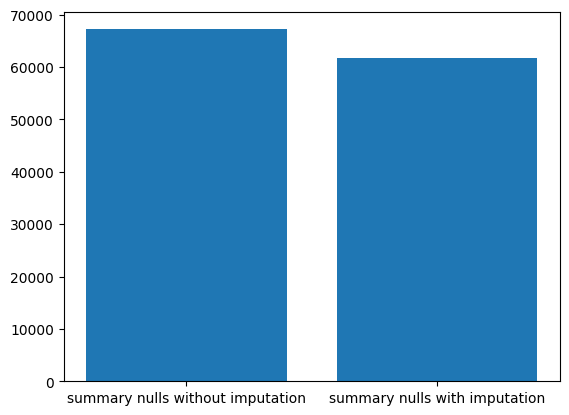

In [12]:
plt.bar(['summary nulls without imputation', 'summary nulls with imputation'], [books.summary.isnull().sum(), b.summary.isnull().sum()])

In [84]:
b[b[['book_title','book_author']].duplicated()].sort_values(by='book_title')

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
15243,0451168089,'Salem's Lot,Stephen King,1990.0,signet book,http://images.amazon.com/images/P/0451168089.0...,en,['French-Canadian fiction'],A nightmare of evil grips a small Maine town w...,images/0451168089.01.THUMBZZZ.jpg
52626,0385007515,'Salem's Lot,Stephen King,1993.0,bantam,http://images.amazon.com/images/P/0385007515.0...,en,['Fiction'],A nightmare of evil grips a small Maine town w...,images/0385007515.01.THUMBZZZ.jpg
46781,0515123471,10 Lb. Penalty,Dick Francis,1998.0,jove books,http://images.amazon.com/images/P/0515123471.0...,en,['Detective and mystery stories'],Ben Juliard&#39;s dream of becoming a jockey i...,images/0515123471.01.THUMBZZZ.jpg
117852,1566196264,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,1995.0,dorset press,http://images.amazon.com/images/P/1566196264.0...,en,['Dream interpretation'],Gustavus Hindman Miller&#39;s groundbreaking m...,images/1566196264.01.THUMBZZZ.jpg
41017,1564142493,100 Ways to Motivate Yourself,Steve Chandler,1996.0,dorling kindersley,http://images.amazon.com/images/P/1564142493.0...,en,['Computers'],NaN,images/1564142493.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
146331,0718143728,"\Blackadder\""""",Richard Curtis,1998.0,michael joseph,http://images.amazon.com/images/P/0718143728.0...,en,['Black Adder (Television program)'],A collection of scripts from the television se...,images/0718143728.01.THUMBZZZ.jpg
85207,1561705357,"\Life Was Never Meant to Be a Struggle\""""",Stuart Wilde,1998.0,hay house,http://images.amazon.com/images/P/1561705357.0...,en,['Self-Help'],"On this amusing CD program, Stuart Wilde helps...",images/1561705357.01.THUMBZZZ.jpg
21189,0553346687,"\Surely You're Joking, Mr. Feynman!\"": Adventu...",Richard P. Feynman,1990.0,bantam,http://images.amazon.com/images/P/0553346687.0...,en,['Biography & Autobiography'],"In this phenomenal bestseller, Nobel Prize-win...",images/0553346687.01.THUMBZZZ.jpg
70213,0312113536,"\You're Okay, It's Just a Bruise\"": A Doctor's...",Rob Huizenga,1994.0,st. martin's press,http://images.amazon.com/images/P/0312113536.0...,en,['Sports & Recreation'],"The author, former team physician for the Los ...",images/0312113536.01.THUMBZZZ.jpg


In [86]:
b['summary'].fillna('none', inplace = True)

In [87]:
b.summary.isnull().sum()

0

In [88]:
# b.to_csv('./books_for_txtmodel.csv', index = False)